In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats
sns.set()
temp_data = pd.read_csv("C:\Project_Files\Capstone1_Files\German_CreditRating_Cleaned_Data.csv")
temp_data.shape

(1000, 21)

In [61]:
# Undersampling Good Customer Instances to have 1:1 ratio between Good and Bad Customers
good_customers = temp_data[temp_data['credibility'] == 1]
bad_customers = temp_data[temp_data['credibility'] == 0]
#good_customers.drop(good_customers.index, inplace=True)
#bad_customers.drop(bad_customers.index, inplace=True)
good_customers = good_customers.sample(n=300,random_state=42)
print(good_customers.shape)
print(bad_customers.shape)
good_customers.head()
svm_data = pd.concat([bad_customers,good_customers])
svm_data.shape

(300, 21)
(300, 21)


(600, 21)

In [62]:
duration_data = svm_data['duration']
credit_data = svm_data['credit_amount']
age_data = svm_data['age']
credibility_data = svm_data['credibility']
svm_data.drop(['duration','credit_amount','age','credibility'],axis=1,inplace=True)
svm_data.head()

,checking_account_status,credit_history,purpose,savings_account,present_employment,installment_rate,personal_status_sex,debtors_guarontors,present_residence,property,installment_plans,housing,credits_at_bank,job,people_liable,telephone,worker
1,2,2,3,1,3,2,2,1,2,1,3,2,1,3,1,1,1
4,1,3,0,1,3,3,3,1,4,4,3,3,2,3,2,1,1
9,2,4,0,1,1,4,4,1,2,3,3,2,2,4,1,1,1
10,2,2,0,1,2,3,2,1,1,3,3,1,1,3,1,1,1
11,1,2,9,1,2,3,2,1,4,2,3,1,1,3,1,1,1


In [65]:
# binary transfomration of categorical features and add the numerical features back to the dataset
svm_data = pd.concat([pd.get_dummies(svm_data[col]) for col in svm_data],axis=1,keys=svm_data.columns)
svm_data['credit_amount'] = credit_data
svm_data['duration'] = duration_data
svm_data['age'] = age_data

In [66]:
svm_data.head()

checking_account_status          credit_history             purpose ...  \
                         1  2  3  4              0  1  2  3  4       0 ...   
1                        0  1  0  0              0  0  1  0  0       0 ...   
4                        1  0  0  0              0  0  0  1  0       1 ...   
9                        0  1  0  0              0  0  0  0  1       1 ...   
10                       0  1  0  0              0  0  1  0  0       1 ...   
11                       1  0  0  0              0  0  1  0  0       0 ...   

   job people_liable    telephone    worker    credit_amount duration age  
     4             1  2         1  2      1  2                             
1    0             1  0         1  0      1  0          5951       48  22  
4    0             0  1         1  0      1  0          4870       24  53  
9    1             1  0         1  0      1  0          5234       30  28  
10   0             1  0         1  0      1  0          1295       12  25  
11   0             1  0         1  0      1  0          4308       48  24  

[5 rows x 70 columns]

In [68]:
# Linear SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

X_train,X_test,y_train,y_test = train_test_split(svm_data,credibility_data,test_size=0.20,random_state=42)

In [69]:
y_train.value_counts()

1    242
0    238
Name: credibility, dtype: int64

In [70]:
# Determination of Algorithms after scaling and applying default Hyperparameters

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledLinearSVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.710417 (0.059984)
ScaledKNN: 0.677083 (0.059839)
ScaledCART: 0.608333 (0.063053)
ScaledNB: 0.681250 (0.080175)
ScaledLinearSVM: 0.720833 (0.056057)
ScaledSVM: 0.714583 (0.045691)


In [71]:
# Tuning LinearSVC using C hyperparameter

linearSVC_steps = [("Scaler",StandardScaler()),
                     ("svm_clf",LinearSVC())]
linear_svc_clf = Pipeline(linearSVC_steps)

# parameters of an Estimator  -->  linear_svc_clf.get_params().keys()

parameters_linear_svc = dict(svm_clf__C=[0.0001,0.001,0.01,0.1,1,10])
grid_linear_svc = GridSearchCV(linear_svc_clf,param_grid=parameters_linear_svc,cv=5)
grid_linear_svc_result =grid_linear_svc.fit(X_train,y_train)
print("Best: %f using %s" %(grid_linear_svc_result.best_score_,grid_linear_svc_result.best_params_))

Best: 0.729167 using {'svm_clf__C': 0.001}


In [73]:
# Tuning SVC using C and gamma hyperparameters

svc_steps = [("Scaler",StandardScaler()),
             ("svc_clf",SVC())]
svc_clf = Pipeline(svc_steps)

# parameters of an Estimator  -->  svc_clf.get_params().keys()
parameters_svc = dict(svc_clf__C=[.001,.01,.1,1,10],svc_clf__gamma=[.001,.01,.1,1,5],svc_clf__kernel=['linear','poly','rbf','sigmoid'])
grid_svc = GridSearchCV(svc_clf,param_grid=parameters_svc,cv=5)
grid_svc_result = grid_svc.fit(X_train,y_train)
print("Best: %f using %s" %(grid_svc_result.best_score_,grid_svc_result.best_params_))
mean_svm = grid_svc_result.cv_results_['mean_test_score']
std_svm = grid_svc_result.cv_results_['std_test_score']
params_svm = grid_svc_result.cv_results_['params']
#for mean,std,param in zip(mean_svm,std_svm,params_svm):
#   print("%f (%f) with : %r :" %(mean,std,param))

Best: 0.735417 using {'svc_clf__C': 0.1, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'sigmoid'}


In [74]:
# Evaluation on Test Data for SVC
scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
model = SVC(C=.1,gamma=.01,kernel='sigmoid',probability= True)
print(model.get_params().keys())
model.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
predicted_y = model.predict(scaled_Xtest)

print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
print("Confusion Matrix:-")
print(confusion_matrix(y_test, predicted_y))
print("Classification report:-")
print(classification_report(y_test, predicted_y))
print(y_test.value_counts())

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Accuracy score is : 0.716666666667
Confusion Matrix:-
[[45 17]
 [17 41]]
Classification report:-
             precision    recall  f1-score   support

          0       0.73      0.73      0.73        62
          1       0.71      0.71      0.71        58

avg / total       0.72      0.72      0.72       120

0    62
1    58
Name: credibility, dtype: int64


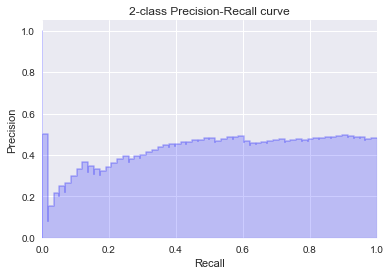

In [75]:
y_scores = model.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

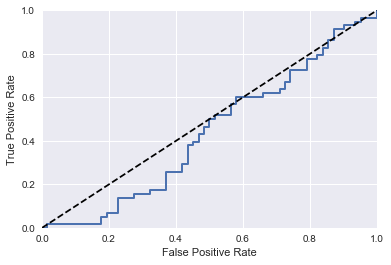

In [77]:
# ROC Curve using Decision Function for SVC

y_scores = model.decision_function(X_test)
fpr,tpr,_ = roc_curve(y_test,y_scores)
#print(fpr)
#print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

In [78]:
# Evaluation on Test Data for LinearSVC

scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
model2 = SVC(C=.001,kernel='linear')
print(model2.get_params().keys())
model2.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
predicted_y = model2.predict(scaled_Xtest)
print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
print("Confusion Matrix:-")
print(confusion_matrix(y_test, predicted_y))
print("Classification report:-")
print(classification_report(y_test, predicted_y))
print(y_test.value_counts())

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Accuracy score is : 0.725
Confusion Matrix:-
[[47 15]
 [18 40]]
Classification report:-
             precision    recall  f1-score   support

          0       0.72      0.76      0.74        62
          1       0.73      0.69      0.71        58

avg / total       0.73      0.72      0.72       120

0    62
1    58
Name: credibility, dtype: int64


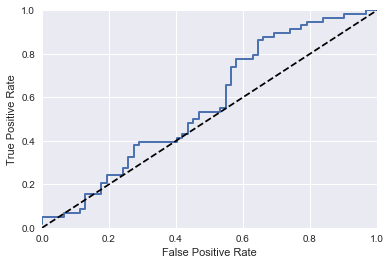

In [79]:
# ROC Curve using Decision Function for SVC

y_scores = model2.decision_function(X_test)
#print(y_scores)
fpr,tpr,_ = roc_curve(y_test,y_scores)
#print(fpr)
#print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()